<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/Statistical_Models_2/blob/main/Forex_111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [67]:
#!pip install yfinance # Installing yfinance
#!pip install quantstats # Installing Quantstats
#!pip install pyportfolioopt # installing PyPortfolioOpt
#!pip install ta # Installing the TA (Technical Analysis) library
#!pip install pandas-datareader

In [68]:
# Importing Libraries
# Data handling and statistical analysis
from pandas_datareader import data
from scipy import stats
# Data visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel
# Financial data
import quantstats as qs
import ta
import yfinance as yf
# Linear Regression Model
from sklearn.linear_model import LinearRegression
# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Datetime and hiding warnings
import datetime as dt
import pandas_datareader.data as web

import yfinance as yf

In [175]:
start = dt.datetime(2022, 1, 1)
end  = dt.datetime.today()

In [70]:
SP500  = yf.download("^GSPC", start= start, end= end)
DowJ   = yf.download("^DJI", start= start, end= end)
GOLD   =  yf.download("GC=F", start= start, end= end)
EUR    = yf.download("EURUSD=X", start= start, end= end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [71]:
# Converting timezone
#SP500.index = SP500.index.tz_convert(None)

## Daily Returns
A stock's daily return is the percentual change in price over a single day. You calculate it by subtracting the difference between the stock's closing price on one day and its closing price the day before, dividing the result by the
closing of the day before, and multiplying it by 100.

For instance, if a stock closes at 100 dollars on Monday, and it closes at
102 dollars on Tuesday, its daily return would be calculated as:

((102-100)/100)*100 = 2%

This shows that the stock increased in value by 2% over the course of
one day. On the other hand, if the stock had closed at 98 dollars on
Tuesday, the daily return would be calculated as:

((98-100)/100)*100 = -2%

Which means that the stock has decreased in value by 2% over the
course of one day.

Daily returns are relevant for investors because they provide a quick
way to check the performance of a stock over a short period.

With Quantstats, it's possible to plot daily returns charts, which are
graphical representations of the daily percentage changes in stocks,
allowing investors to visualize the ups and downs of the stock's daily performance over time and extract information on volatility and
consistency of returns.
In order to start our analysis, we're going to use Quantstats
utils.download_returns method to download the daily returns for four
different US stocks over the same period of time, for a fair comparison
and analysis between them.

We now have the daily returns from July 1st, 2010, to February 10th,
2023, for four different US stocks from distinct industries, Apple, Tesla,
The Walt Disney Company, and AMD.

We can now plot the daily returns chart for each of them using
Quantstats.

In [87]:
EUR = EUR[["Adj Close"]]
SP500  = SP500[["Adj Close"]]
DowJ   = DowJ[["Adj Close"]]
GOLD   =  GOLD[["Adj Close"]]



In [88]:
#elements = pd.DataFrame({"DowJ": DowJ, "SP500":SP500, "GOLD":GOLD, "EUR":EUR})
#pd.concat([GOLD, EUR, SP500, DowJ], axis=1, keys=[GOLD, EUR, SP500, DowJ])

In [90]:
for element in elements:
  print(element)
  #qs.plots.daily_returns(SP500, benchmark=1)


DowJ
SP500
GOLD
EUR


## Cumulative Returns

To calculate a stock's cumulative return, the first thing to do is to
determine the stock's initial price and its final price at the end of the
specified period. Then subtract the initial price from the final price, add
any dividends or other income received, and divide the result by the
initial price. This gives us the cumulative return as a decimal, which can
be multiplied by 100 to express it as a percentage.

It's important to note that cumulative return takes into account the
effects of compounding, meaning that any gains from a previous period
are reinvested and contribute to additional gains in future periods,

which can result in a larger cumulative return than the simple average
of the individual returns over the specified period.

Below, we can see line charts displaying the cumulative return for each
one of the stocks we've downloaded since July, 2010.

In [91]:
elements = [DowJ, SP500, GOLD, EUR]
#qs.plots.returns(GOLD)

In [96]:
# Plotting Cumulative Returns for each stock
for el in elements:
  print("\n")
  #qs.plots.returns(GOLD)

In [97]:
# Plotting histograms for daily returns
for df in elements:
  print('\n')
  print('\nApple Daily Returns Histogram')
  #qs.plots.histogram(df, resample = 'D')




Apple Daily Returns Histogram



Apple Daily Returns Histogram



Apple Daily Returns Histogram



Apple Daily Returns Histogram


## Kurtosis

A high kurtosis value for daily returns may indicate frequent
fluctuations in price that deviate significantly from the average returns
of that investment, which can lead to increased volatility and risk
associated with the stock.

A kurtosis value above 3.0 defines a leptokurtic distribution,
characterized by outliers and more values that are distant from the
average, which reflects in the histogram as stretching of the horizontal
axis. Stocks with a leptokurtic distribution are generally associated with
a higher level of risk but also offer the potential for higher returns due
to the substantial price movements that have occurred in the past.

In the image below, it's possible to see the difference between a negative
kurtosis on the left and a positive kurtosis on the right. The distribution
on the left displays a lower probability of extreme values and a lower
concentration of values around the mean, while the distribution on the
right shows a higher concentration of values near the mean, but also the
existence (and thus a higher probability of occurrence) of extreme
values.

Kurtosis measures the concentration of observations in the tails versus
the center of a distribution. In finance, a high level of excess kurtosis, or
"tail risk," represents the chance of a loss occurring as a result of a rare
event. This type of risk is important for investors to consider when

making investment decisions, as it may impact the potential returns
and stability of a particular stock.

In [98]:
for df in elements:
  # Using quantstats to measure kurtosis
  print('\n')
  print(f"kurtosis: ", qs.stats.kurtosis(df).round(2))



kurtosis:  Adj Close    17.97
dtype: float64


kurtosis:  Adj Close    11.77
dtype: float64


kurtosis:  Adj Close    4.03
dtype: float64


kurtosis:  Adj Close    1.71
dtype: float64


## Skewness

Skewness is a metric that quantifies the asymmetry of returns. It
reflects the shape of the distribution and determines if it is symmetrical,
skewed to the left, or skewed to the right.

Below, it is possible to see two different asymmetrical distributions. On
the left, it shows an example of a positively skewed distribution, with a
long right tail, indicating a substantial probability of extremely positive
daily returns compared to a normal distribution. On the other hand, a
negatively skewed distribution would most likely resemble the
distribution on the right, with a long tail representing more frequency
of outliers on the negative side of returns.

A skewness value of zero indicates a symmetrical distribution, in which
observations are evenly distributed on both sides of the mean, and the
right and left tails are of approximately equal size.

The skewness is calculated with the following formula:

$$skewness = \frac{\mu^3(x)-3*\mu(x)*\sigma^2(x)-\mu^3(x)}{\sigma^3(x)}$$

Where x represents the set of returns data, μ represents the mean of the
returns, and σ represents the standard deviation of the returns. This
formula results in a single numerical value that summarizes the
skewness of returns.

In [99]:
for df in elements:
  # Using quantstats to measure kurtosis
  print('\n')
  # Measuring skewness with quantstats
  print('\n')
  print("Apple's skewness: ", qs.stats.skew(df).round(2))





Apple's skewness:  Adj Close   -0.52
dtype: float64




Apple's skewness:  Adj Close   -0.48
dtype: float64




Apple's skewness:  Adj Close   -0.12
dtype: float64




Apple's skewness:  Adj Close   -0.07
dtype: float64


-1, 1 - strong


-0.5/0.5 slight

## Standard Deviation
Standard deviation is a widely used statistical metric that quantifies the
variability of the dataset. When applied to a stock's daily returns, it can
indicate the risk level associated with investing in that particular stock.
A stock exhibiting high daily return volatility, characterized by a high
standard deviation, is considered riskier when compared to one with
low daily return volatility, represented by a low standard deviation.

$$\sigma = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2}$$

here x represents the set of returns data, is the mean of the returns
data, and N is the number of observations. Standard deviation enables
investors to assess the risk level and to compare the volatility of
different stocks. For instance, if two assets have similar average returns,
but one has a higher standard deviation, it is usually considered a
riskier investment. Hence, standard deviation serves as a useful tool in
helping investors to make informed decisions regarding their
investment choices and portfolio management.


In [101]:
for df in elements:
  # Calculating Standard Deviations
  print('\n')
  print("Apple's Standard Deviation from 2010 to 2023: ", df.std().round(3))



Apple's Standard Deviation from 2010 to 2023:  Adj Close    3493.775
dtype: float64


Apple's Standard Deviation from 2010 to 2023:  Adj Close    522.556
dtype: float64


Apple's Standard Deviation from 2010 to 2023:  Adj Close    113.251
dtype: float64


Apple's Standard Deviation from 2010 to 2023:  Adj Close    0.063
dtype: float64


## Correlation analysis

in the stock market allows us for interesting
investment strategies. A widely known strategy in the market is called
Long-Short, which is the act of buying shares of a company, while
selling shares of another company, believing that both assets will have
opposite directions in the market. That is, when one goes up, the other
goes down. To develop Long-Short strategies, investors rely on
correlation analysis between stocks.
Correlation analysis is not only useful for Long-Short strategies, but it's
also crucial to avoid systemic risk, which is described as the risk of the
breakdown of an entire system rather than simply the failure of
individual parts. To make it simple, if your portfolio has stocks that are
highly correlated, or are all in the same industry, if something happens
to that specific industry, all of your stocks may lose market value and it
can cause greater financial losses.
Pairplots and correlation matrices are useful tools to visualize
correlation among assets. In the correlation matrix, values range
between -1 and 1, where -1 represents a perfect negative correlation and
1 represents a perfect positive correlation. Keep in mind that, when
assets are positively correlated, they tend to go up and down
simultaneously in the market, while the opposite is true for those that
are negatively correlated.


In [103]:
# Merging daily returns into one dataframe
merged_df = pd.concat([df, DowJ, GOLD, EUR], join = 'outer', axis = 1)
merged_df.columns = ['SP500', 'DowJ', 'GOLD', 'EUR']
merged_df.tail(3)# Displaying dataframe

,SP500,DowJ,GOLD,EUR
Date,,,,
2023-12-20,1.098105,37082.000000,2034.500000,1.098105
2023-12-21,1.094571,37404.351562,2039.099976,1.094571
2023-12-22,1.100619,37385.968750,2057.100098,1.100619


In [104]:
merged_df.shape

(1038, 4)

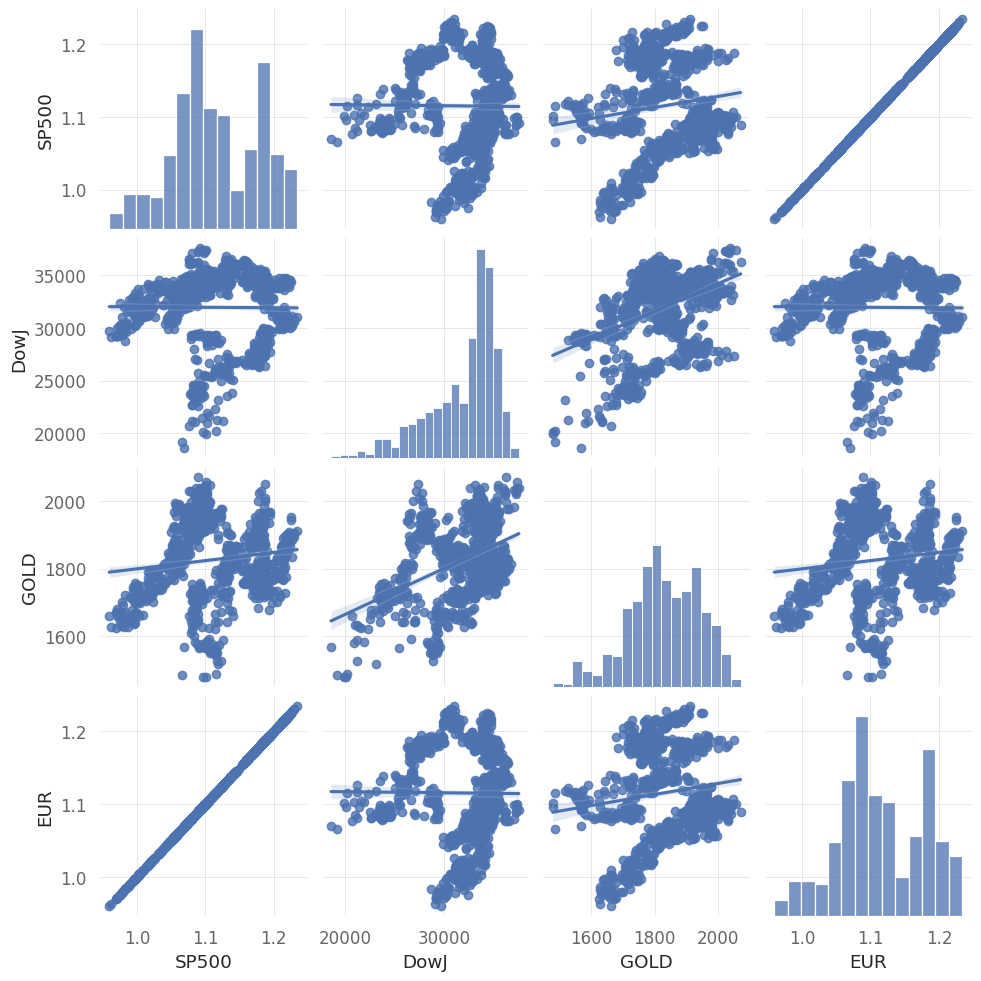

In [105]:
# Pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

<Axes: >

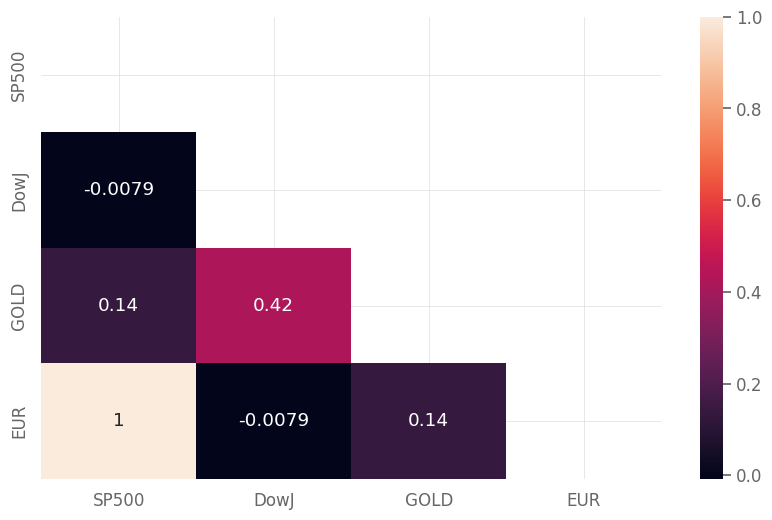

In [106]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

## Beta and Alpha
Beta and Alpha are two key metrics used in finance to evaluate the
performance of a stock relative to the overall market. Beta is a measure
of a stock's volatility compared to the market. A Beta of 1 means that the
stock is as volatile as the market, a Beta greater than 1 indicates higher
volatility than the market, and a Beta less than 1 suggests lower
volatility.
Alpha, on the other hand, is a measurement of a stock's excess return
relative to its expected performance based on its Beta. A positive Alpha
indicates that a stock has outperformed its expected performance based
on its Beta, while a negative Alpha suggests underperformance. By
analyzing the Beta and Alpha values of stocks, investors can get a better
understanding of the risk and potential returns of the stock compared
to the market, and make informed investment decisions accordingly.
To determine Beta and Alpha, we require data from the SP500, which
acts as the benchmark, to fit a linear regression model between the
stocks and the index. This will enable us to extract the Beta and Alpha
values of the stocks.
Let's then load data on the SP500:

In [108]:
# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2022-01-01':'2023-02-10']


gold = qs.utils.download_returns("GC=F")
gold = gold.loc['2022-01-01':'2023-02-10']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [109]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
gold_no_index  = gold.reset_index(drop = True)

In [111]:
# Fitting linear relation among Gold returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = gold_no_index.values.reshape(-1,1)
linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('GOLD beta: ', beta.round(3))
print('GOLD alpha: ', alpha.round(3))



GOLD beta:  [0.083]
GOLD alpha:  [0.]


Beta values for all the stocks are greater than 1, meaning that they are
more volatile than the benchmark and may offer higher returns, but
also come with greater risks. On the other hand, the alpha values for all
the stocks are small, close to zero, suggesting that there is little
difference between the expected returns and the risk-adjusted returns.

## Sharpe Ratio
The Sharpe ratio is a measure of the risk-adjusted return of an
investment. It is calculated by dividing the average excess return of the
investment over the standard deviation of the returns, as shown by the
following equation:

$$Sharp Ration = \frac{R_p - R_f}{\sigma_p}$$

where Rp is the average return of the investment, Rf
is the risk-free rate
of return, and σp is the standard deviation of the returns. The average
excess return is the difference between the average return of the
investment and the risk-free rate of return, typically represented by a
government bond. The standard deviation is a measurement of the
volatility of returns.

A higher Sharpe ratio indicates that an investment provides higher
returns for a given level of risk compared to other investments with a
lower Sharpe ratio. In general, a Sharpe ratio greater than 1 is
considered good, while a Sharpe ratio less than 1 is considered poor. A
Sharpe ratio of 1 means that the investment's average return is equal to
the risk-free rate of return.

In general, a Sharpe ratio under 1.0 is considered bad, equal to 1.0 is
considered acceptable or good, 2.0 or higher is rated as very good, and
3.0 or higher is considered excellent.



In [117]:

# Calculating Sharpe ratio
print('\n')
print(f"Sharpe Ratio for: ", qs.stats.sharpe(EUR).round(2))
print(f"Sharpe Ratio for: ", qs.stats.sharpe(GOLD).round(2))



Sharpe Ratio for:  Adj Close   -0.02
dtype: float64
Sharpe Ratio for:  Adj Close    0.54
dtype: float64


# 2  Building and Optimizing Portfolios
## What is a Portfolio?
A portfolio in financial markets is a collection of financial assets, such
as stocks, bonds, commodities, and other investments, held by an
individual or institution. Portfolios provide investors with a way to
diversify their investments, manage risk, and increase returns.

To build a portfolio, investors must select a combination of assets that
are expected to perform well under different economic and market
conditions. The allocation of funds to each asset is determined by the
investor's risk tolerance and investment goals. This process involves
analyzing the investor's financial situation, objectives, time horizon,
and risk tolerance, as well as researching and analyzing individual
securities and market trends. Portfolios are dynamic and should be
reviewed and adjusted periodically to reflect changes in market
conditions and in the investor's financial situation, or goals.

The weights in a portfolio refer to the percentage of the total value
allocated to each individual asset. Allocating weights is a critical aspect
of portfolio building because it determines the level of risk and return
characteristics of the portfolio. The weight assigned to an asset reflects
the investor's confidence in the asset's ability to generate returns and
their willingness to accept its associated risk. Weights can be
determined by analyzing an asset's historical performance, future
growth prospects, sector exposure, and diversification benefits.

Portfolio managers may use various techniques, such as modern
portfolio theory and factor-based investing, to determine optimal
weightings. Getting the weightings right is crucial to achieving the
desired outcomes and is a key factor in the success of any investment
strategy.

To start exploring portfolio construction and optimization, we ought to
build a portfolio consisting of the four stocks that have been analyzed so
far, with an initial weighting of 25% each.

,Adj Close
Date,
2020-01-01,NaN
2020-01-02,8413.068240
2020-01-03,8355.012013
2020-01-06,8379.244259
2020-01-07,8348.444867
...,...
2023-12-18,11018.492291
2023-12-19,11091.446100
2023-12-20,10953.987051


With Quantstats you can easily create a report to compare the
portfolio's performance and its level of risk with a benchmark, which in
this case is the SP500. The platform provides various metrics and useful
visualizations to analyze the portfolio's performance and risk.


In [158]:
SP500  = yf.download("^GSPC", start= start, end= end)
DowJ   = yf.download("^DJI", start= start, end= end)
GOLD   =  yf.download("GC=F", start= start, end= end)
EUR    = yf.download("EURUSD=X", start= start, end= end)
EUR = EUR[["Adj Close"]]
SP500  = SP500[["Adj Close"]]
DowJ   = DowJ[["Adj Close"]]
GOLD   =  GOLD[["Adj Close"]]

weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = EUR*weights[0] + GOLD*weights[1] + SP500*weights[2] + DowJ*weights[3] # C
portfolio = portfolio["Adj Close"].fillna(0) # Displaying portfolio's daily returns

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2022-01-04   2022-01-04
End Period                 2023-12-22   2023-12-22
Risk-Free Rate             0.0%         0.0%
Time in Market             55.0%        97.0%

Cumulative Return          -14.72%      -100.0%
CAGR﹪                     -5.44%       -100.0%

Sharpe                     -0.36        -3.0
Prob. Sharpe Ratio         30.18%       0.0%
Smart Sharpe               -0.35        -2.89
Sortino                    -0.51        -2.95
Smart Sortino              -0.49        -2.84
Sortino/√2                 -0.36        -2.09
Smart Sortino/√2           -0.34        -2.01
Omega                      0.09         0.09

Max Drawdown               -25.38%      -100.0%
Longest DD Days            717          717
Volatility (ann.)          17.33%       292.57%
R^2                        0.0          0.0
Information Ratio          -0.19        -0.19
Calmar        

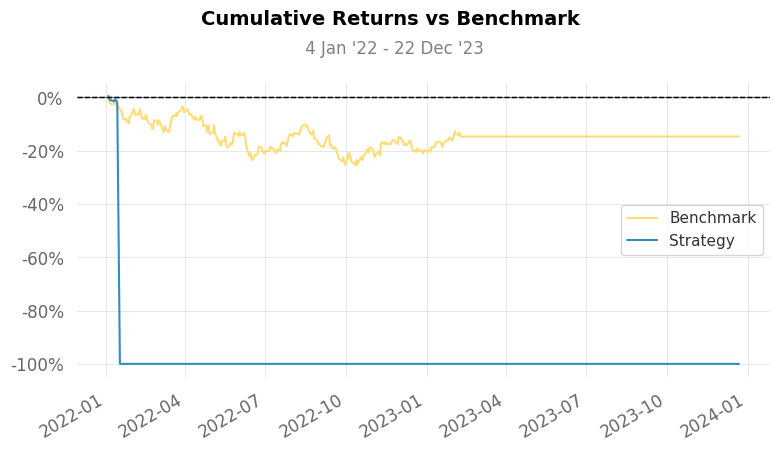

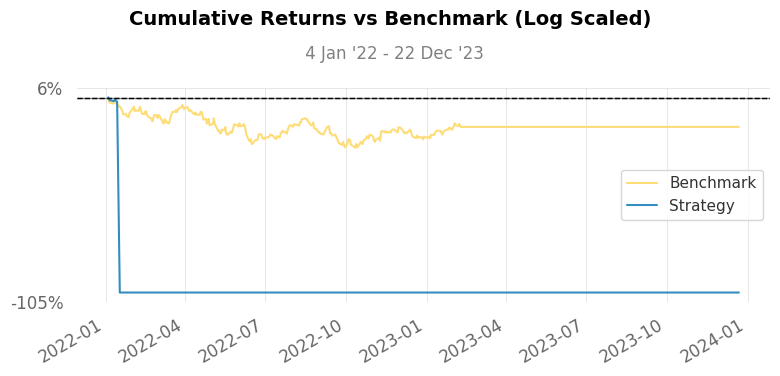

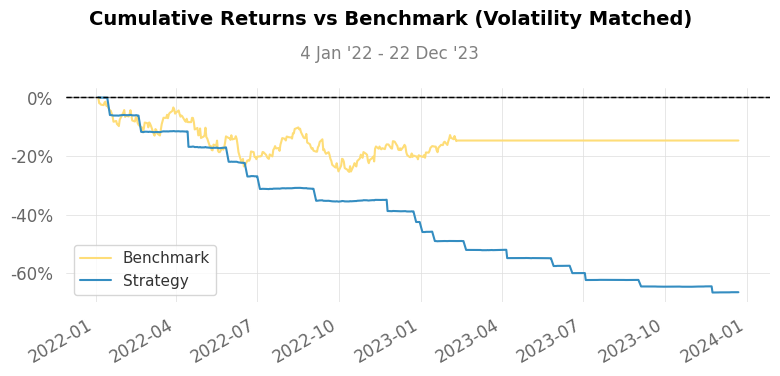

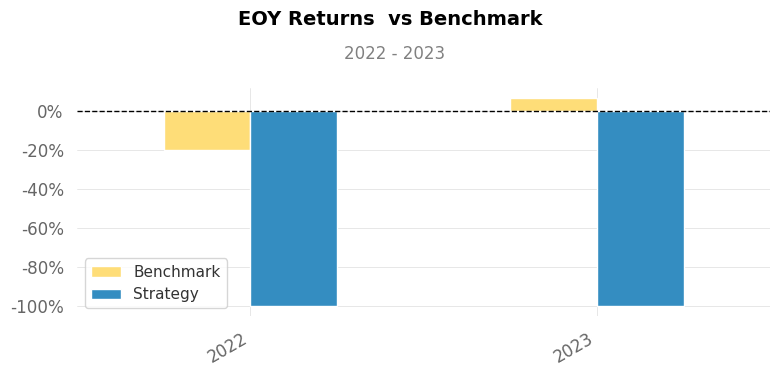

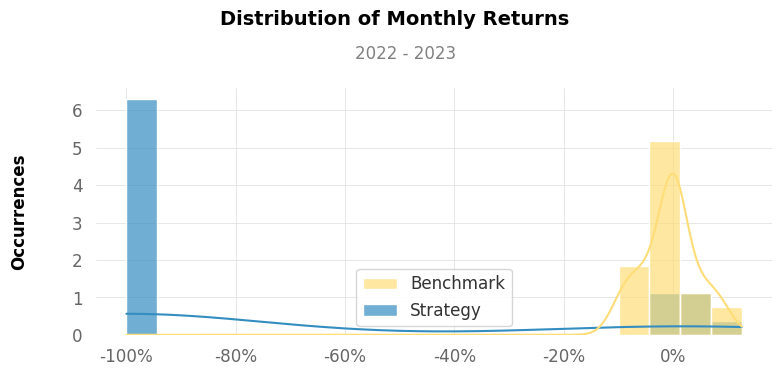

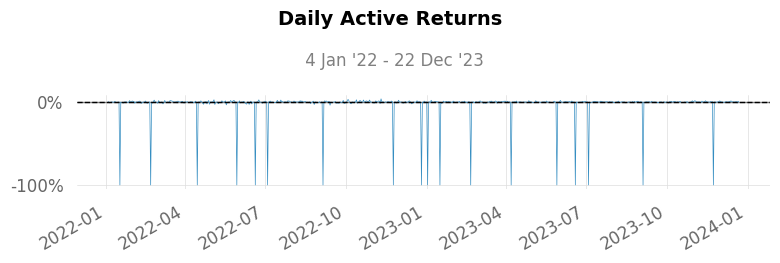

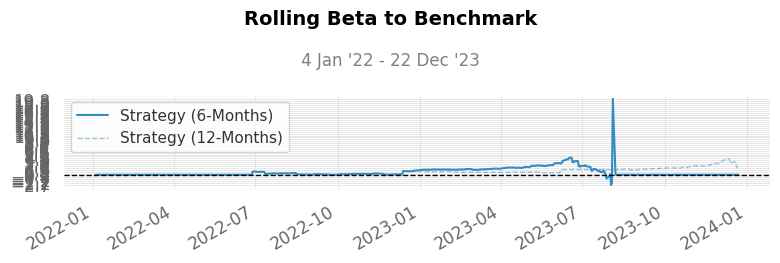

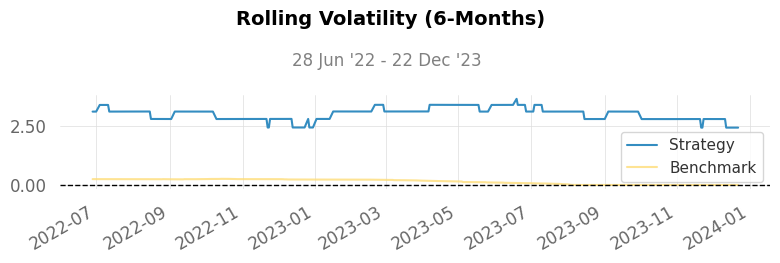

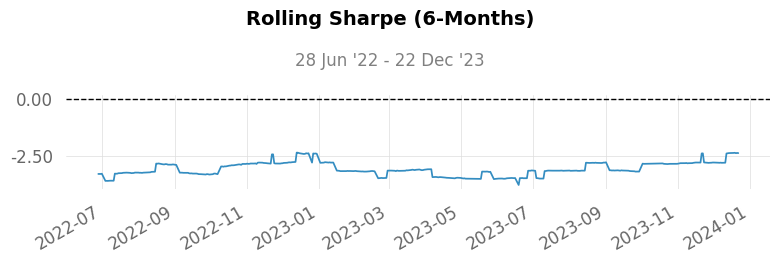

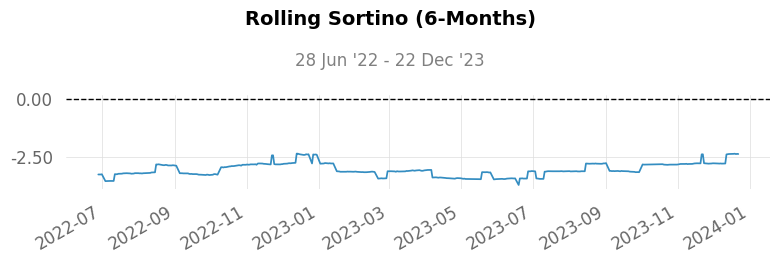

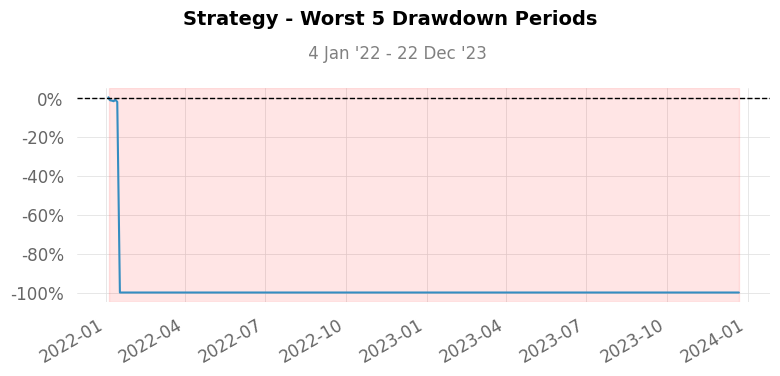

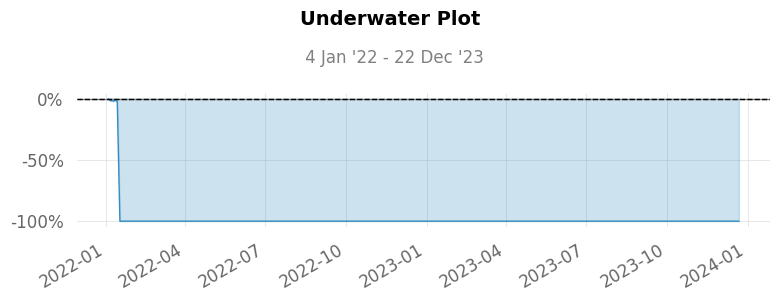

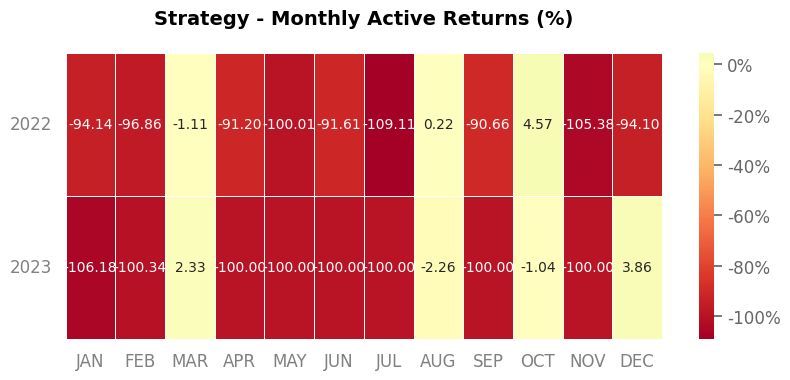

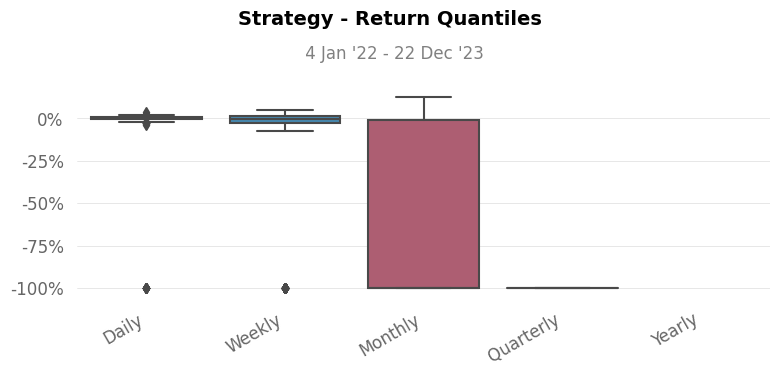

In [159]:
# Generating report on portfolio performance from July 1st, 2010 to February 10th,
qs.reports.full(portfolio, benchmark = sp500)

## Optimizing Portfolio
Portfolio optimization is the process of selecting the optimal
combination of assets and weights to maximize returns and minimize
risk. This process involves selecting the most appropriate weights for
each asset,by taking into account the historical performance of the
assets, their correlations with each other, and other relevant factors
such as market conditions and economic outlook. The main goal is to
create a well-diversified portfolio that balances risk and returns, and
that aligns with the investor's risk tolerance.

In Python, PyPortfolioOpt is a very useful library for portfolio
optimization, providing an efficient and easy-to-use toolset for
constructing optimal portfolios, with a wide range of optimization
algorithms and methods available. These include modern portfolio
theory, minimum variance portfolio, maximum diversification portfolio,

Black-Litterman optimization, and many more.
To start the optimization process, we must have a pandas dataframe
containing the adjusted closing prices of the stocks, with dates as index,
and each columns representing each stock. This dataframe will serve as
input to optimize the weighting of the stocks in the portfolio

In [148]:
SP500  = yf.download("^GSPC", start= start, end= end)
DowJ   = yf.download("^DJI", start= start, end= end)
GOLD   =  yf.download("GC=F", start= start, end= end)
EUR    = yf.download("EURUSD=X", start= start, end= end)
EUR = EUR[["Adj Close"]]
SP500  = SP500[["Adj Close"]]
DowJ   = DowJ[["Adj Close"]]
GOLD   =  GOLD[["Adj Close"]]

# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([GOLD, EUR, DowJ, SP500], join = 'outer', axis = 1)
df.columns = ["GOLD", "EUR", "DowJ", "SP500"]
df # Visualizing dataframe for input

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,GOLD,EUR,DowJ,SP500
Date,,,,
2020-01-01,NaN,1.122083,NaN,NaN
2020-01-02,1524.500000,1.122083,28868.800781,3257.850098
2020-01-03,1549.199951,1.117144,28634.880859,3234.850098
2020-01-06,1566.199951,1.116196,28703.380859,3246.280029
2020-01-07,1571.800049,1.119799,28583.679688,3237.179932
...,...,...,...,...
2023-12-18,2026.300049,1.089526,37306.019531,4740.560059
2023-12-19,2038.400024,1.092383,37557.921875,4768.370117
2023-12-20,2034.500000,1.098105,37082.000000,4698.350098


In [152]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Markowitz Mean-Variance Optimization Model

The Markowitz Mean-Variance Optimization Model is a widely-used
framework for constructing portfolios with the best risk-return
relationship. It is based on the idea that investors should maximize the
expected return of a portfolio while minimizing its risk.
PyPortfolioOpt simplifies the implementation of the Markowitz MeanVariance Optimization Model, allowing investors to easily determine

how to allocate weights across a portfolio for maximal Sharpe ratio,
besides many other different objectives according to each investor's risk
tolerance and goals.

There are two key requirements for mean-variance optimization:
First, we need to have expected returns for each of the assets in the
portfolio. PyPortfolioOpt provides the expected_returns module, which
calculates expected returns for the assets by computing the arithmetic
mean of their daily percentage changes. The module assumes that daily
prices are available as input and produces expected annual returns as
output. More information on this topic is available here.

Secondly, we need to choose a risk model that quantifies the level of risk
in each asset. The most commonly used risk model is the covariance
matrix, which describes the volatilities of assets and the degree to which
they are co-dependent. Choosing an appropriate risk model is critical,
because it can help to reduce risk by making many uncorrelated bets.
PyPortfolioOpt offers a range of risk models to choose from, including
the annualized sample covariance matrix of daily returns,

semicovariance matrix, and exponentially-weighted covariance matrix.
Further information on risk models can be found here

In [153]:
# Calculating the annualized expected returns and the annualized sample covariance
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix
mu
S

GOLD     0.075605
EUR     -0.004682
DowJ     0.064906
SP500    0.096319
dtype: float64

,GOLD,EUR,DowJ,SP500
GOLD,0.026610,0.000999,0.003992,0.004535
EUR,0.000999,0.005990,0.000317,0.000271
DowJ,0.003992,0.000317,0.049268,0.048238
SP500,0.004535,0.000271,0.048238,0.051371


Now that we have estimated the expected returns and the covariance
matrix, we can use these inputs for portfolio optimization.

The PyPortfolioOpt library provides the EfficientFrontier class, which
takes the covariance matrix and expected returns as inputs. The weights
variable stores the optimized weights for each asset based on the
specified objective, which in this case is the maximization of the Sharpe
ratio, achieved by using the max_sharpe method.

PyPortfolioOpt offers various other optimization objectives, such as
weights optimized for minimum volatility, maximum returns for a given
target risk, maximum quadratic utility, and many others. To read more
on optimization objectives, click here.


In [154]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization
clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips nea
# Printing optimized weights and expected performance for portfolio
clean_weights


OrderedDict([('GOLD', 0.5853), ('EUR', 0.0), ('DowJ', 0.0), ('SP500', 0.4147)])

After running the optimizer, it resulted in an optimized weighting for a
portfolio where 70.83% of its allocation is invested in Apple stocks, and
the remaining 29.17% invested in Tesla stocks. No allocation was made
to Disney or AMD.
With the optimized weights in hand, we can construct a new portfolio
and use Quantstats to compare its performance to that of the previously constructed portfolio.

In [160]:
SP500  = yf.download("^GSPC", start= start, end= end)
GOLD   =  yf.download("GC=F", start= start, end= end)


SP500  = SP500[["Adj Close"]]

GOLD   =  GOLD[["Adj Close"]]

# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([GOLD,  SP500], join = 'outer', axis = 1)
df.columns = ["GOLD",  "SP500"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2020-01-02,2243.320285
2020-01-03,2248.239067
2020-01-06,2262.929160
2020-01-07,2262.433086
2020-01-08,2260.586090
...,...
2023-12-18,3151.903675
2023-12-19,3170.518622
2023-12-20,3139.198635


[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-03   2020-01-03
End Period                 2023-12-22   2023-12-22
Risk-Free Rate             0.0%         0.0%
Time in Market             97.0%        97.0%

Cumulative Return          -100.0%      -100.0%
CAGR﹪                     -100.0%      -100.0%

Sharpe                     -2.92        -2.92
Prob. Sharpe Ratio         0.0%         0.0%
Smart Sharpe               -2.81        -2.81
Sortino                    -2.88        -2.88
Smart Sortino              -2.77        -2.77
Sortino/√2                 -2.03        -2.03
Smart Sortino/√2           -1.96        -1.96
Omega                      0.11         0.11

Max Drawdown               -100.0%      -100.0%
Longest DD Days            1433         1433
Volatility (ann.)          287.83%      287.83%
R^2                        1.0          1.0
Information Ratio          -       

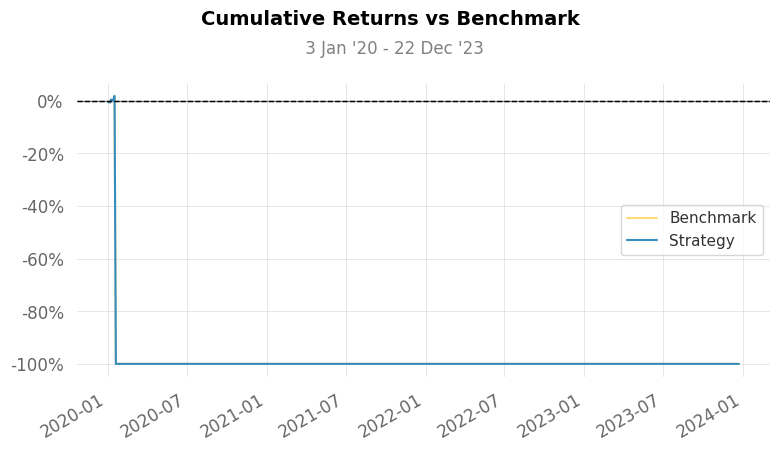

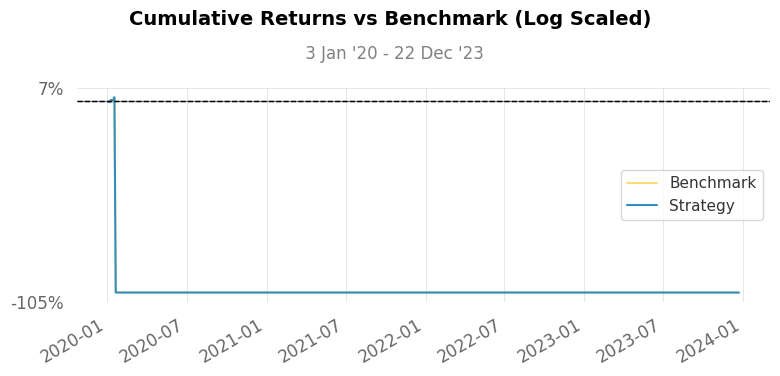

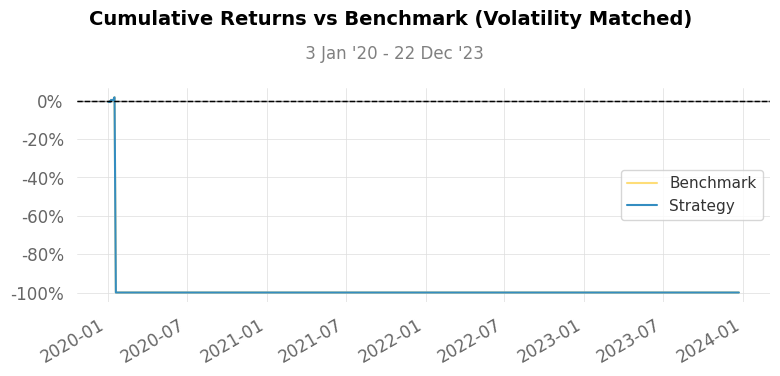

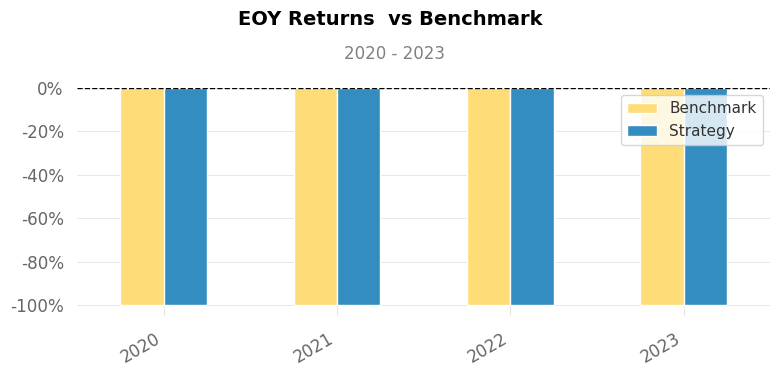

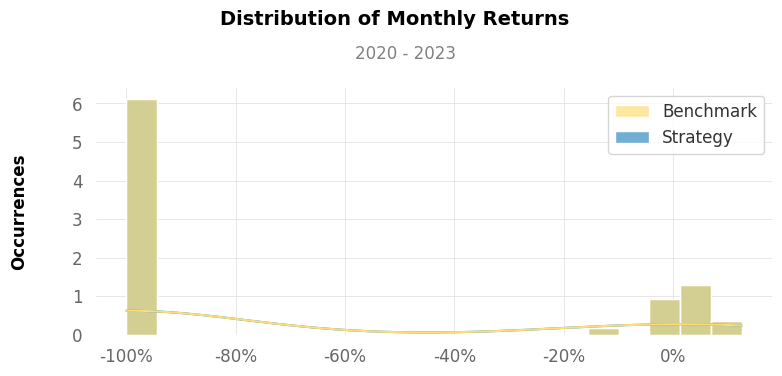

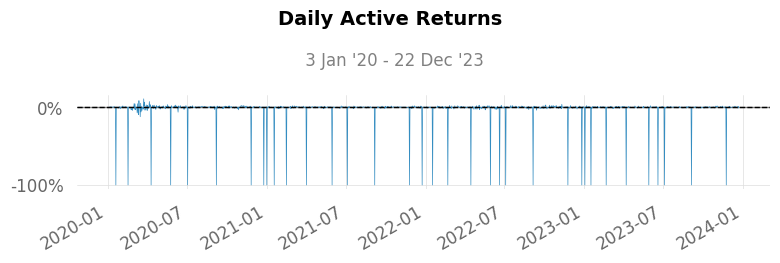

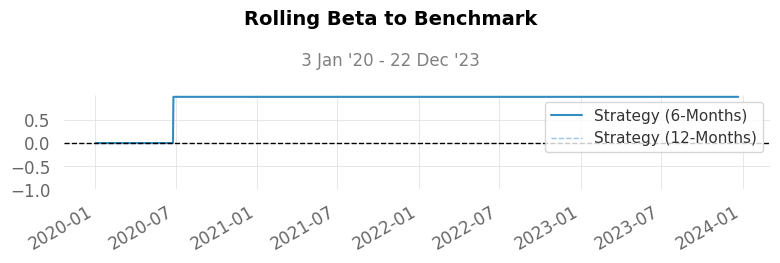

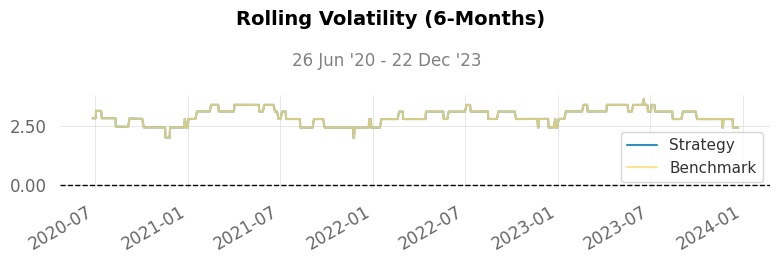

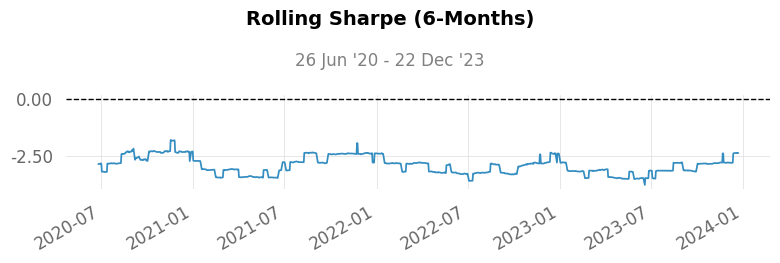

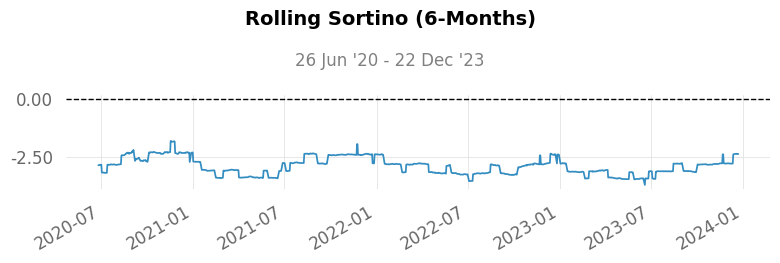

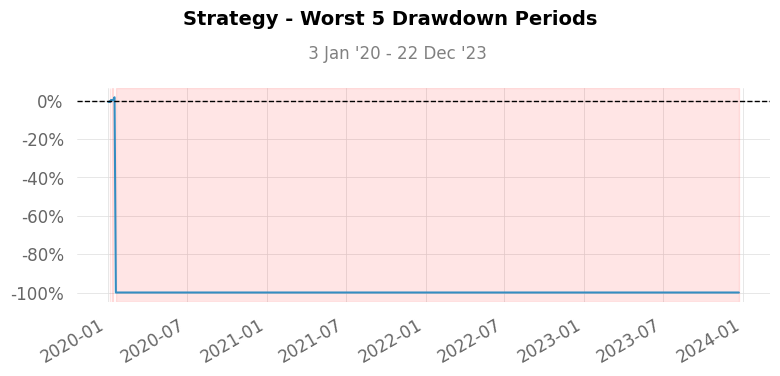

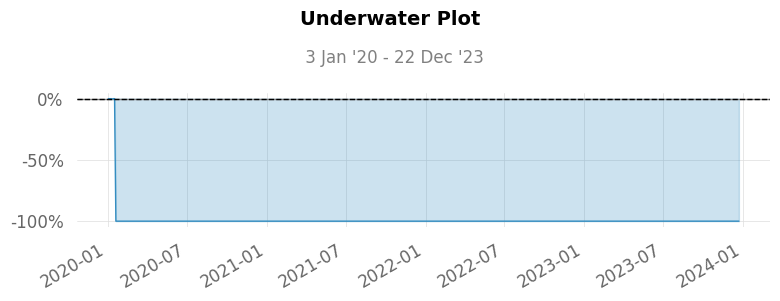

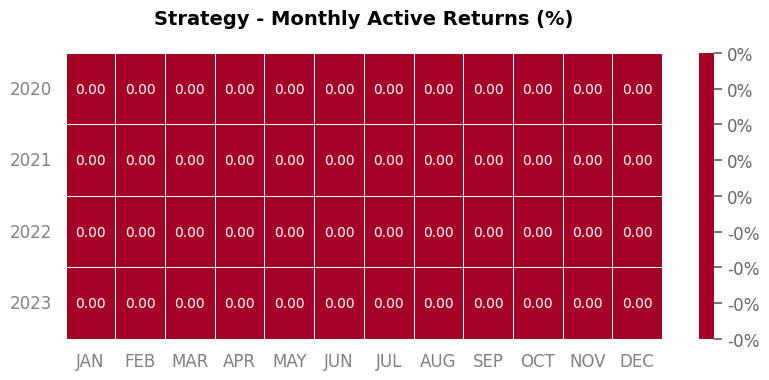

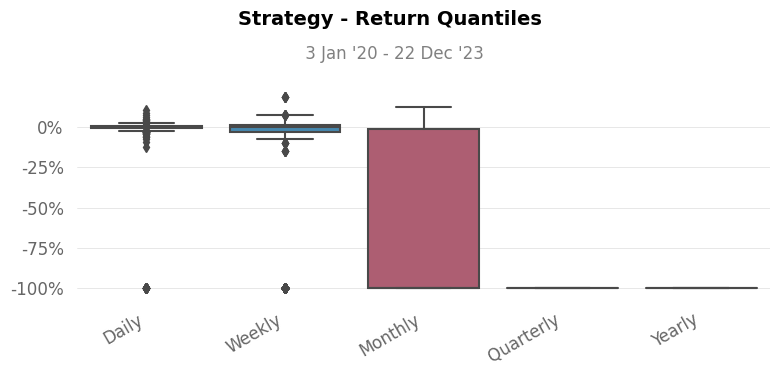

In [162]:
# Creating new portfolio with optimized weights
new_weights = [0.5853, 0.4147]
optimized_portfolio = GOLD*new_weights[0] + SP500*new_weights[1]
optimized_portfolio # Visualizing daily returns
optimized_portfolio = optimized_portfolio.fillna(0)
qs.reports.full(portfolio, benchmark = portfolio)

In [157]:

# Displaying new reports comparing the optimized portfolio to the first portfolio c
qs.reports.full(optimized_portfolio, benchmark = optimized_portfolio)

TypeError: ignored

Fundamental Indicators

Just as we have a broad range of technical indicators, the same applies
to fundamental indicators used by investors when they're looking for
relevant information when deciding whether to invest in a company or
not.

The most commonly used fundamental indicators include earnings per
share (EPS), price-to-earnings ratio (P/E ratio), return on equity
(ROE), debt-to-equity ratio, and dividend yield. These indicators
provide insights into the company's profitability, valuation, efficiency,
financial leverage, and dividend payments. Overall, fundamental
analysis involves examining a company's financial and economic data to
evaluate its financial health and potential for growth.

I'll also briefly present to you some fundamental indicators, so we can
make comparison on the stocks we've been working on for now.
Earnings per Share (EPS)

Earnings per share (EPS) is an indicator that measures a company's net
profit per the number of stocks available in the stock market. It is
calculated by dividing the net profit by the total number of shares. The
EPS provides a way for investors to evaluate a company's profitability
on a per-share basis. A higher EPS indicates a company that is more
profitable, which may lead to increased demand for its shares and a
higher stock price in the future.

Price-to-Earnings Ratio (P/E)

The P/E ratio indicator serves to compare a company's stock price to its
earnings per share (EPS). It is calculated by dividing the current stock
price by the EPS. The P/E ratio provides investors with insight into how
much they are paying for each dollar of earnings. A higher P/E ratio
indicates that investors are willing to pay more for each dollar of
earnings, which may suggest that they expect the company to grow in
the future.

Return on Equity (ROE)

The ROE indicator measures a company's profitability by calculating
the amount of net income generated as a percentage of the company's
shareholder equity. It is calculated by dividing the net income by the
shareholder equity. The ROE provides a way for investors to evaluate
how effectively a company is using its equity to generate profits. A
higher ROE indicates a more efficient use of shareholder equity, which
can lead to increased demand for shares and higher stock price, as well
as increase in company's profits in the future.

Debt-to-Equity Ratio

The debt-to-equity ratio is an indicator that measures a company's
leverage by comparing its total liabilities to its shareholder equity. It is
calculated by dividing the total liabilities by the shareholder equity. The
debt-to-equity ratio provides investors with insight into how much debt
a company is using to finance its operations. A higher debt-to-equity
ratio suggests that a company is relying more on debt financing, which
increase its financial risk.

Dividend Yield

The dividend yield is an indicator that measures the annual dividend
income generated by a company's stock relative to its current market
price. It is calculated by dividing the annual dividend per share by the
current market price per share. The dividend yield provides a way for
investors to evaluate the income potential of a company's stock. A
higher dividend yield indicates that the company is paying out a larger
portion of its profits as dividends, which can be attractive to investors
looking for passive income.

In [163]:
# Getting AAPL data
# aapl = yf.Ticker("AAPL")
# aapl_eps = aapl.info['trailingEps']
# aapl_pe_ratio = aapl.info['trailingPE']
# aapl_roe = aapl.info['returnOnEquity']*100
# aapl_dy = aapl.info['dividendYield']*100
# Getting AMD data
# amd = yf.Ticker("AMD")
# amd_eps = amd.info['trailingEps']
# amd_pe_ratio = amd.info['trailingPE']
# amd_roe = amd.info['returnOnEquity']*100
# amd_dy = amd.info['dividendYield']*100


In [165]:
aapl_eps

6.14

In [166]:
# AAPL indicators (obtained from https://finance.yahoo.com/quote/AAPL/key-statistic
aapl_eps = 5.89
aapl_pe_ratio = 26.12
aapl_roe = 147.94
aapl_dy = 0.60
# AMD indicators (obtained from https://finance.yahoo.com/quote/AMD/key-statistics?
amd_eps = 0.82
amd_pe_ratio = 96.62
amd_roe = 4.24
amd_dy = 0.00
# Printing data
print('\n')
print('Apple (AAPL) Fundamental Indicators: ')
print('\n')
print('Earnings per Share (EPS): ',aapl_eps)
print('Price-to-Earnings Ratio (P/E): ', aapl_pe_ratio)
print('Return on Equity (ROE): ', aapl_roe,"%")
print('Dividend Yield: ', aapl_dy,"%")
print('\n')
print('AMD Fundamental Indicators: ')
print('\n')
print('Earnings per Share (EPS): ',amd_eps)
print('Price-to-Earnings Ratio (P/E): ', amd_pe_ratio)
print('Return on Equity (ROE): ',amd_roe,"%")
print('Dividend Yield: ', amd_dy,"%")
print('\n')




Apple (AAPL) Fundamental Indicators: 


Earnings per Share (EPS):  5.89
Price-to-Earnings Ratio (P/E):  26.12
Return on Equity (ROE):  147.94 %
Dividend Yield:  0.6 %


AMD Fundamental Indicators: 


Earnings per Share (EPS):  0.82
Price-to-Earnings Ratio (P/E):  96.62
Return on Equity (ROE):  4.24 %
Dividend Yield:  0.0 %




To briefly draw some conclusion on the indicators above, it can be
stated that, compared to AMD, AAPL has a higher EPS, indicating that
they are generating a higher net profit per share. AAPL also has a lower
P/E ratio, meaning that the stock is less expensive per unit of earnings.
It also has an incredibly high ROE, which suggests that they are doing a
good job of managing shareholders' equity to generate profits. On the
other hand, AMD has a relatively low ROE, indicating that the company
is not as profitable when compared to AAPL. AAPL also has a modest
dividend yield of 0.6%, indicating that they pay dividends to
shareholders, while AMD does not pay any dividends at all.
Overall, it can be inferred that the indicators above suggest that AAPL is
a more profitable company with a more mature business model than

## Backtesting

Backtesting is the process of evaluating the performance of a trading
strategy based on historical market data. In other words, it involves
testing a trading strategy using historical data to see how it would have
performed if it had been applied in the past. This allows traders and
investors to assess the profitability and effectiveness of their trading
strategies before applying them to live trading.

With Python, it is extremely easy to perform backtesting on historic
data to se how a portfolio performs on a single strategy, or multiple
different strategies applied to many financial securities.

Below, we're going to backtest the RSI strategy and the moving average
crossover strategy, which are two different types of trading strategies,
on the EUR/USD currency pair, one of the most traded pair in Forex, in
three different timeframes.


## Moving Average Crossover Backtesting
The moving average crossover strategy, in contrast to the RSI strategy,
is a trend-following strategy. This strategy is based on two different
moving averages, one representing a shorter period and another
representing a longer period.

When the shorter moving average crosses above the longer moving
average, it's a signal to buy, and when it crosses below the longer
moving average, it's a signal to sell.

For this backtesting, I used an exponential moving average of 9 periods
for the shorter moving average and a simple moving average of 20
periods for the longer moving average. The choice of an exponential
moving average for the shorter period is because it gives more weight to
recent prices, making it more responsive to market changes compared
to the simple moving average.

Once again, we'll consider an initial capital of 100.00 dollars for this
backtesting.

In [176]:
EUR    = yf.download("EURUSD=X", start= start, end= end)
# Creating the 9-period exponential moving average with the TA library
EUR['ema50'] = ta.trend.ema_indicator(EUR['Adj Close'], window=50)
# Creating the 20-period exponential moving average with the TA library
EUR['sma100'] = ta.trend.sma_indicator(EUR['Adj Close'], window=100)
EUR[['Open', 'High', 'Low', 'Adj Close', 'ema50', 'sma100']] # Displaying

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Adj Close,ema50,sma100
Date,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,NaN,NaN
2022-01-04,1.130199,1.132300,1.127345,1.130224,NaN,NaN
2022-01-05,1.128541,1.134559,1.127764,1.128363,NaN,NaN
2022-01-06,1.131222,1.133067,1.128554,1.131350,NaN,NaN
2022-01-07,1.129586,1.135976,1.129050,1.129688,NaN,NaN
...,...,...,...,...,...,...
2023-12-18,1.089526,1.093004,1.089455,1.089526,1.079323,1.075672
2023-12-19,1.092383,1.098800,1.091608,1.092383,1.079835,1.075598
2023-12-20,1.098105,1.097972,1.093565,1.098105,1.080551,1.075571


In [177]:
# Plotting Candlestick chart with the moving averages
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.05)
fig.add_trace(go.Candlestick(x=EUR.index,
 open=EUR['Open'],
 high=EUR['High'],
 low=EUR['Low'],
 close=EUR['Adj Close'],
 name='EUR/USD'))
# 9 EMA
fig.add_trace(go.Scatter(x=EUR.index,
 y=EUR['ema50'],
 mode='lines',
line=dict(color='yellow'),
 name='EMA 50'))
# 20 SMA
fig.add_trace(go.Scatter(x=EUR.index,
 y=EUR['sma100'],
 mode='lines',
line=dict(color='green'),
 name='SMA 100'))
# Annotation
fig.add_annotation(text='EUR/USD 1D',
 font=dict(color='white', size=40),
 xref='paper', yref='paper',
 x=0.5, y=0.65,
 showarrow=False,
 opacity=0.2)
# Layout
fig.update_layout(title='EUR/USD Hourly Candlestick Chart from 2021 to 2023',
 yaxis=dict(title='Price'),
 height=1000,
 template = 'plotly_dark')
fig.update_xaxes(rangeslider_visible=False)
fig.show()

In [ ]:
# Defining the parameters for the moving average crossover strategy
short_ma = 'ema50'
long_ma = 'sma100'
# Creating a new column to hold the signals
EUR['signal'] = 0
# Generating the entry signals

for i in range(1, len(EUR)):
  if EUR[short_ma][i] > EUR[long_ma][i] and EUR[hourly_eur_usd['signal']][i] = 1 # buy signal
   elif hourly_eur_usd[short_ma][i] < hourly_eur_usd[long_ma][i] and hourly_eur_us [..] hourly_eur_usd['signal'][i] = -1 # sell signal
# Calculating total returns
hourly_eur_usd['returns'] = hourly_eur_usd['Adj Close'].pct_change()
hourly_eur_usd['cumulative_returns'] = (1 + hourly_eur_usd['returns']).cumprod() - ...

# Applying the signals to the returns
hourly_eur_usd['strategy_returns'] = hourly_eur_usd['signal'].shift(1) * hourly_eur

# Calculating the cumulative returns
hourly_eur_usd['cumulative_strategy_returns'] = (1 + hourly_eur_usd['strategy_retur
# Setting the initial capital
initial_capital = 100

                                                                    # Calculating total portfolio value
hourly_eur_usd['portfolio_value'] = (1 + hourly_eur_usd['strategy_returns']).cumpro
# Printing the number of trades, initial capital, and final capital
num_trades = hourly_eur_usd['signal'].abs().sum()
final_capital = hourly_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital * 100


print('\n')
print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")
print('\n')
# Plotting strategy value
fig = go.Figure()
fig.add_trace(go.Scatter(x=hourly_eur_usd.index,
 y=hourly_eur_usd['portfolio_value'].round(2),
 mode='lines',
line=dict(color='#00BFFF'),
 name='Portfolio Value'))
fig.update_layout(title='Portfolio - Moving Average Crossover Strategy on Hourly Da
 xaxis_title='Date',
 yaxis_title='Value ($)',
 template='plotly_dark',
 height = 600)
fig.show()